# Hudson County SR1A Viz
#### https://community.modeanalytics.com/python/libraries/seaborn/

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [47]:
# Load Jersey City SR1A data
sr1a = r'~/Code/DATA/nj_hudson_jc_sr1a_2009to2016.csv'
df = pd.read_csv(sr1a, low_memory=False)

In [48]:
# add column with year from deed_date (could do better)

def yearcol(x):
    year = int(x[:4])
    return year

df['year'] = df['deed_date'].apply(yearcol)


In [49]:
# set the date index
df['deed_date'] =  pd.to_datetime(df['deed_date'], format='%Y-%m-%d')
df.set_index('deed_date', inplace=True)

In [50]:
#filter out everything before 2009
df = df[df['year'] > 2008]

In [51]:
# remove very high and low
df = df[(df['verified_sales_price']< 1500000) & (df['verified_sales_price']>100)]

In [52]:
# how many left
len(df.index)

19499

In [53]:
# by month

In [54]:
monthly_avg_sp = df.groupby(pd.TimeGrouper(freq='M')).mean()

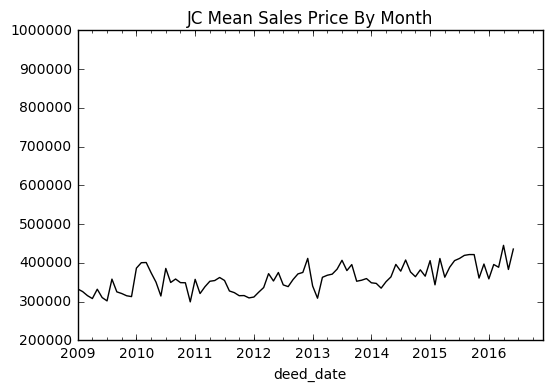

In [59]:
monthly_avg_sp['verified_sales_price'].plot(kind='line', color='k', title='JC Mean Sales Price By Month')

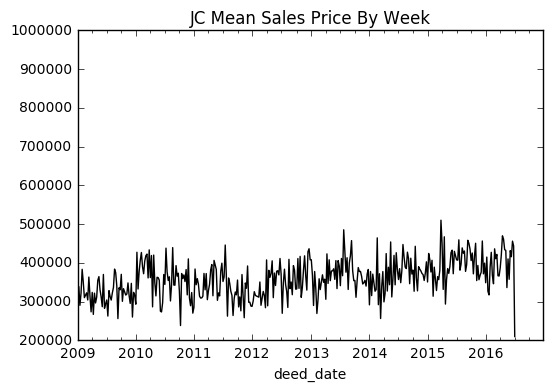

In [62]:
weekly_avg_sp = df.groupby(pd.TimeGrouper(freq='W')).mean()
weekly_avg_sp['verified_sales_price'].plot(kind='line', color='k', title='JC Mean Sales Price By Week')

# Geocoding (only do this once and then write it back to the csv)

In [ ]:
http://chrisalbon.com/python/geocoding_and_reverse_geocoding.html